In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
output_dir = os.path.join('/home/kedoxey/CRCNS/PyramidalCellSimulations','models/NEURON/NMLCL000073-NEURON','output')
firing_rates_fname = 'firing_rates.pkl'
firing_rates_path = os.path.join(output_dir,firing_rates_fname)

with open(firing_rates_path,'rb') as fp:
    firing_rates = pickle.load(fp)

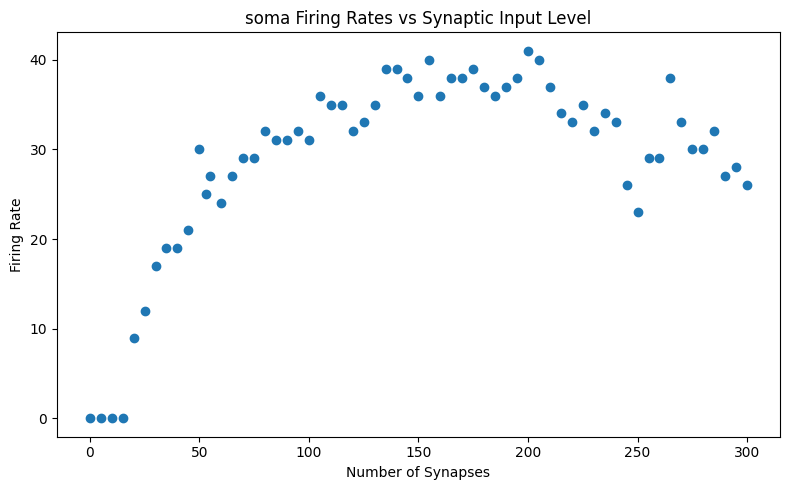

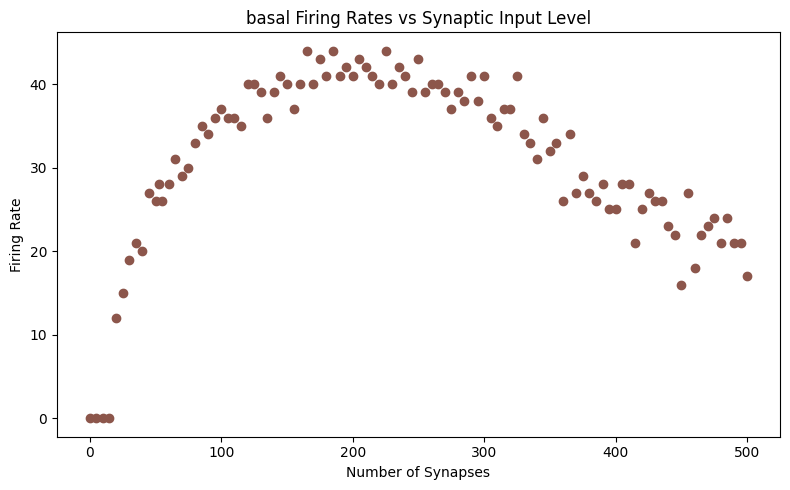

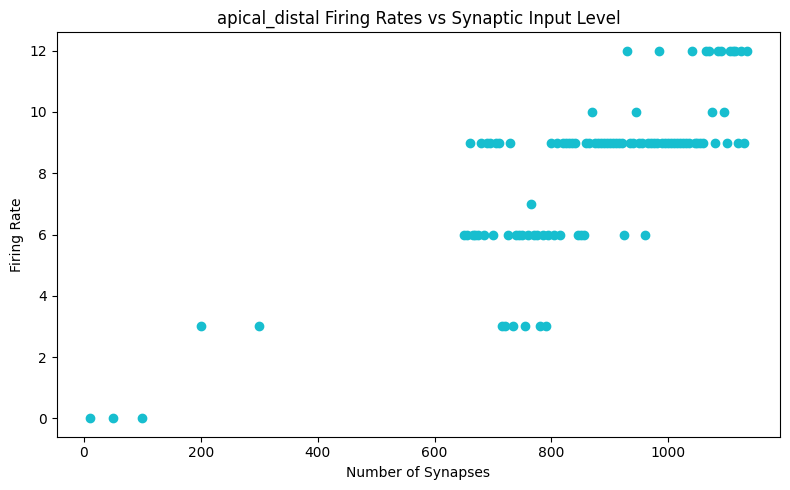

In [3]:
# TODO: create dictionary of colors for each syns_type with a colormap

cmap = mpl.colormaps['tab10']
colors = cmap(np.linspace(0,1,len(firing_rates)))

for i, (syns_type, syns_sim) in enumerate(firing_rates.items()):
    
    fig, axs = plt.subplots(1,1, figsize=(8,5))
    
    for num_syns, firing_rate in syns_sim.items():
        axs.plot(num_syns, firing_rate, 'o', color=colors[i])
        
    axs.set_xlabel('Number of Synapses')
    axs.set_ylabel('Firing Rate')
    axs.set_title(f'{syns_type} Firing Rates vs Synaptic Input Level')
    fig.tight_layout()
        

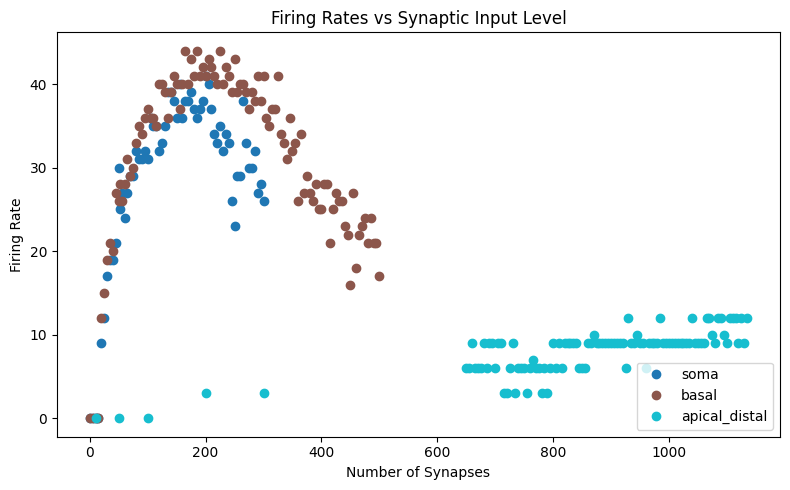

In [4]:
fig, axs = plt.subplots(1,1, figsize=(8,5))

for i, (syns_type, syns_sim) in enumerate(firing_rates.items()):

    syns = []
    rates = []

    for num_syns, firing_rate in syns_sim.items():
        syns.append(num_syns)
        rates.append(firing_rate)

    axs.plot(syns, rates, 'o', color=colors[i], label=syns_type)
        
    axs.set_xlabel('Number of Synapses')
    axs.set_ylabel('Firing Rate')

axs.legend(loc='lower right')
axs.set_title('Firing Rates vs Synaptic Input Level')

fig.tight_layout()
        